<a href="https://colab.research.google.com/github/ruoming1021/NTUST/blob/main/HW_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 719 kB 33.8 MB/s 
     |████████████████████████████████| 1.2 MB 52.0 MB/s 
     |████████████████████████████████| 4.7 MB 56.6 MB/s 
     |████████████████████████████████| 365 kB 61.9 MB/s 
     |████████████████████████████████| 115 kB 74.0 MB/s 
     |████████████████████████████████| 101 kB 13.0 MB/s 
     |████████████████████████████████| 141 kB 79.1 MB/s 
     |████████████████████████████████| 212 kB 65.1 MB/s 
     |████████████████████████████████| 596 kB 62.2 MB/s 
     |████████████████████████████████| 127 kB 70.7 MB/s 
     |████████████████████████████████| 6.6 MB 48.1 MB/s 
Mounted at /content/gdrive


In [4]:
#hide
from fastai.vision.all import *
from fastbook import *
matplotlib.rc('image', cmap='Greys')

In [5]:
path = untar_data(URLs.MNIST)

In [6]:
(path/'training').ls()
# path.ls()
# img = PILImage(PILImage.create(TEST_IMAGE)

(#10) [Path('/root/.fastai/data/mnist_png/training/9'),Path('/root/.fastai/data/mnist_png/training/5'),Path('/root/.fastai/data/mnist_png/training/6'),Path('/root/.fastai/data/mnist_png/training/2'),Path('/root/.fastai/data/mnist_png/training/7'),Path('/root/.fastai/data/mnist_png/training/4'),Path('/root/.fastai/data/mnist_png/training/1'),Path('/root/.fastai/data/mnist_png/training/8'),Path('/root/.fastai/data/mnist_png/training/3'),Path('/root/.fastai/data/mnist_png/training/0')]

In [7]:
dls = ImageDataLoaders.from_folder(path, train = "training",valid="testing")
learn = vision_learner(dls, resnet18, metrics=accuracy)
learn.fine_tune(3)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:136: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and will be removed in 0.15. Please use keyword parameter(s) instead.
  f"Using {sequence_to_str(tuple(keyword_only_kwargs.keys()), separate_last='and ')} as positional "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,time
0,0.687721,0.459144,0.854300,01:39


epoch,train_loss,valid_loss,accuracy,time
0,0.113816,0.067276,0.979300,01:41
1,0.057021,0.039814,0.989400,01:39
2,0.025066,0.036160,0.989500,01:36


In [8]:
learn.fit(10, 0.1)

epoch,train_loss,valid_loss,accuracy,time
0,1.394825,1.654399,0.911600,01:33
1,1.312860,0.429455,0.969500,01:33
2,1.169772,73.275269,0.975700,01:33
3,1.145505,0.597163,0.971000,01:33
4,1.349996,2.045574,0.963000,01:36
5,1.178560,0.580705,0.967700,01:34
6,1.610667,890382.312500,0.882500,01:33
7,1.040965,0.700919,0.965100,01:34
8,1.186782,0.683365,0.963800,01:33
9,1.292460,0.508348,0.969500,01:32


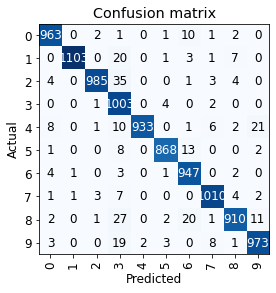

In [9]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()